# KernelKlassifier: Predicting Pumpkin Seed Types with KNN

## Introduction

Pumpkin seeds (Cucurbita pepo) are a widely consumed food and have garnered interest due to their nutritional value and potential health benefits. They vary in characteristics such as size, color, and flavor, which can be indicative of different varieties or cultivars. Creating an accurate and less complicated classification machine such as KNN of pumpkin seeds based on some crucial parameters might aid in understanding their genetic diversity and optimizing cultivation practices that might differ from each seed class.

Therefore, our research question is: Are the variables representing the physical shape of the pumpkin seeds sufficient to provide high accuracy for predicting the type of pumpkin seeds (Çerçevelik and Ürgüp Sivrisi) by using K-nearest neighbors algorithm? 

The data for pumpkin seed type was collected from Kaggle’s Website.  The data was downloaded in an Excel format, consisting of 13 columns and 2500 rows as an observation data. We then converted the Excel file into csv2 format and later uploaded it to GitHub to be accessed programmatically.

## Preliminary exploratory data analysis

### Loading the Data
Our data is stored in our GitHub repository, to get the data, we use:

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
library(readxl)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

Download and read the data from the web

In [2]:
url <- "https://raw.githubusercontent.com/FarrelRamdhani/DSCI-100-Team-Project/main/Pumpkin_Seeds_Dataset.csv"

pumpkin_data_raw <- read_csv2(url)
pumpkin_data_raw

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 2500 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (1): Class
dbl (12): Area, Perimeter, Major_Axis_Length, Minor_Axis_Length, Convex_Area...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,Ürgüp Sivrisi


Here we can see that the data is already tidy, therefore there isn't much for data wranggling

### Data Wranggling

Mutate the data as factor and remove na if there is any.

In [3]:
pumpkin_data <- pumpkin_data_raw |>
    mutate(Class = as.factor(Class)) |>
    drop_na()
pumpkin_data

Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,Ürgüp Sivrisi


### Data Splitting

For this project, we split the data into training data and testing data. The ratio we initially use is 80:20 but might change according to how our model perform.

In [4]:
pumpkin_split <- initial_split(pumpkin_data, prop = 0.8 , strata = Class)  
train_pumpkin <- training(pumpkin_split)   
test_pumpkin <- testing(pumpkin_split)
train_pumpkin
test_pumpkin

Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,Ürgüp Sivrisi


Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
69692,1049.108,421.4875,211.7707,70442,297.8836,0.8646,0.9894,0.6736,0.7957,1.9903,0.7067,Çerçevelik
85461,1136.125,446.2935,245.1551,86344,329.8671,0.8356,0.9898,0.7457,0.8320,1.8205,0.7391,Çerçevelik
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
61013,1020.686,430.3309,180.9423,61554,278.7188,0.9073,0.9912,0.6088,0.7359,2.3783,0.6477,Ürgüp Sivrisi
109033,1328.504,551.7349,252.4540,109892,372.5924,0.8892,0.9922,0.7462,0.7763,2.1855,0.6753,Ürgüp Sivrisi
69836,1010.605,396.6286,224.7918,70419,298.1911,0.8239,0.9917,0.6693,0.8593,1.7644,0.7518,Ürgüp Sivrisi


### Data Summarization

Checking the quantity of each class to make sure the data is balanced.

In [5]:
count_pumpkin <- group_by(train_pumpkin, Class) |>
                    summarize(count = n())
count_pumpkin

Class,count
<fct>,<int>
Çerçevelik,1040
Ürgüp Sivrisi,960


They are kinda equal, so it is good for usage and we dont need to trim the data.

For the next step, we want to know a bit deeper with the data, so we summarize the data for max, min, and average. For simplicity onwards, we will refer Çerçevelik seed as 1 and Ürgüp Sivrisi as 2

In [6]:
pumkin_1_max <- pumpkin_data |>
                        filter(Class == "Çerçevelik") |>
                        select(- Class) |>
                        map_df(max)


pumkin_2_max <- pumpkin_data |>
                        filter(Class == "Ürgüp Sivrisi") |>
                        select(- Class) |>
                        map_df(max)

max_pumpkin <- bind_rows(pumkin_1_max, pumkin_2_max)  |>
                        bind_cols(tibble(Class = c(1,2)))

max_pumpkin

Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
107476,1416.303,614.8959,305.8180,108536,369.9226,0.9360,0.9939,0.7814,0.9396,2.8410,0.9049,1
136574,1559.450,661.9113,297.7952,138384,417.0029,0.9481,0.9944,0.8296,0.8967,3.1444,0.8102,2


In [7]:
pumkin_1_min <- pumpkin_data |>
                        filter(Class == "Çerçevelik") |>
                        select(- Class) |>
                        map_df(min)


pumkin_2_min <- pumpkin_data |>
                        filter(Class == "Ürgüp Sivrisi") |>
                        select(- Class) |>
                        map_df(min)
min_pumpkin <- bind_rows(pumkin_1_min, pumkin_2_min) |>
                            bind_cols(tibble(Class = c(1,2)))

min_pumpkin

Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
55811,888.242,320.8446,185.8440,56394,266.5723,0.4921,0.9542,0.5071,0.6153,1.1487,0.5884,1
47939,868.485,324.0113,152.1718,48366,247.0584,0.7507,0.9186,0.4680,0.5546,1.5138,0.5608,2


In [8]:
pumkin_1_avg <- pumpkin_data |>
                        filter(Class == "Çerçevelik") |>
                        select(- Class) |>
                        map_df(mean)

pumkin_2_avg <- pumpkin_data |>
                        filter(Class == "Ürgüp Sivrisi") |>
                        select(- Class) |>
                        map_df(mean)

average_pumpkin <- bind_rows(pumkin_1_avg, pumkin_2_avg) |>
                    bind_cols(tibble(Class = c(1,2)))

average_pumpkin

Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
78423.15,1089.522,426.2726,234.7769,79286.49,315.1933,0.8305382,0.9890799,0.7070178,0.8274985,1.822609,0.7411627,1
83079.54,1174.432,489.4585,216.0644,83914.81,323.8202,0.8937490,0.9899376,0.6782401,0.7525698,2.279054,0.6639915,2


### Data Visualization

We then plot the training data for visualization and analyze the feasibility of conducting clustering analysis.

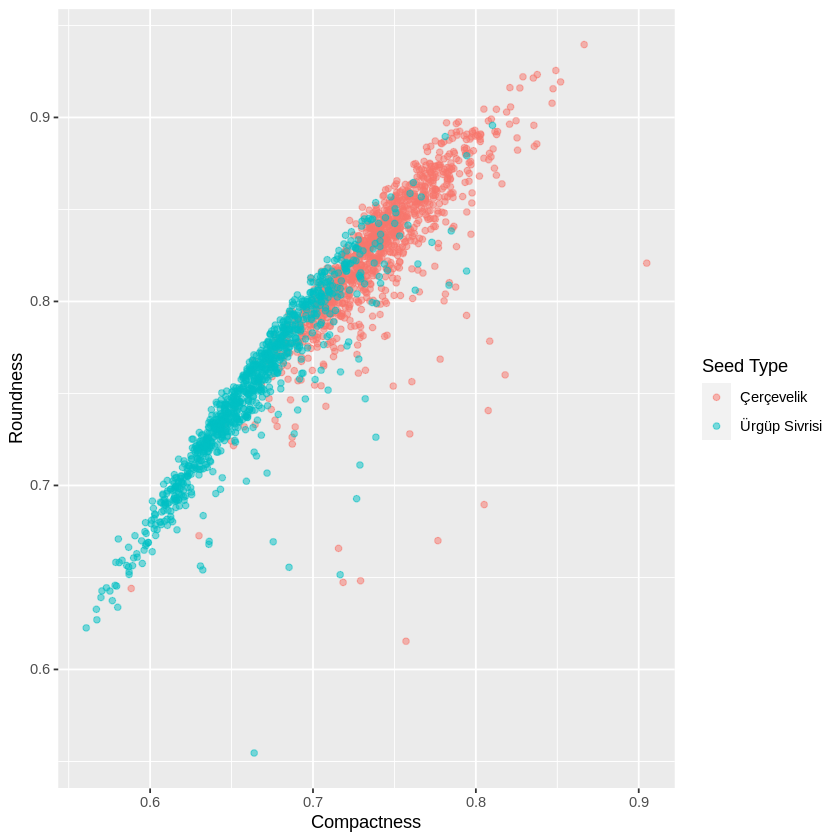

In [9]:
pumpkin_plot_1 <- ggplot(train_pumpkin, aes(x = Compactness, y = Roundness, color = Class)) +
                    geom_point(alpha = 0.5) +
                    labs(x = "Compactness", y = "Roundness", color = "Seed Type")

pumpkin_plot_1

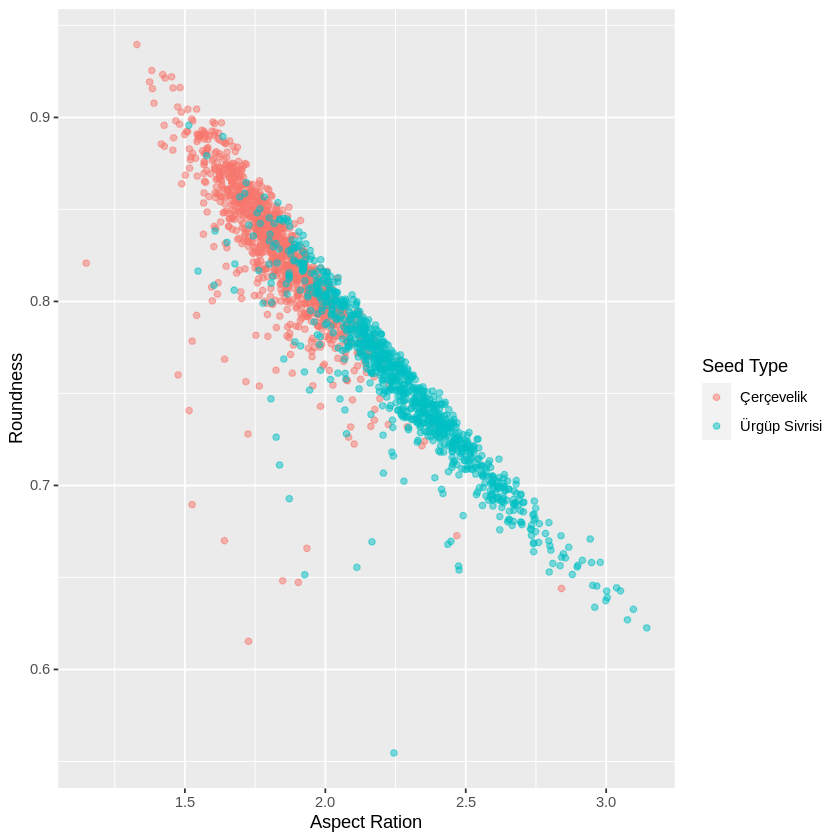

In [10]:
pumpkin_plot_2 <- ggplot(train_pumpkin, aes(x = Aspect_Ration, y = Roundness, color = Class)) +
                    geom_point(alpha = 0.5) +
                    labs(x = "Aspect Ration", y = "Roundness", color = "Seed Type")

pumpkin_plot_2

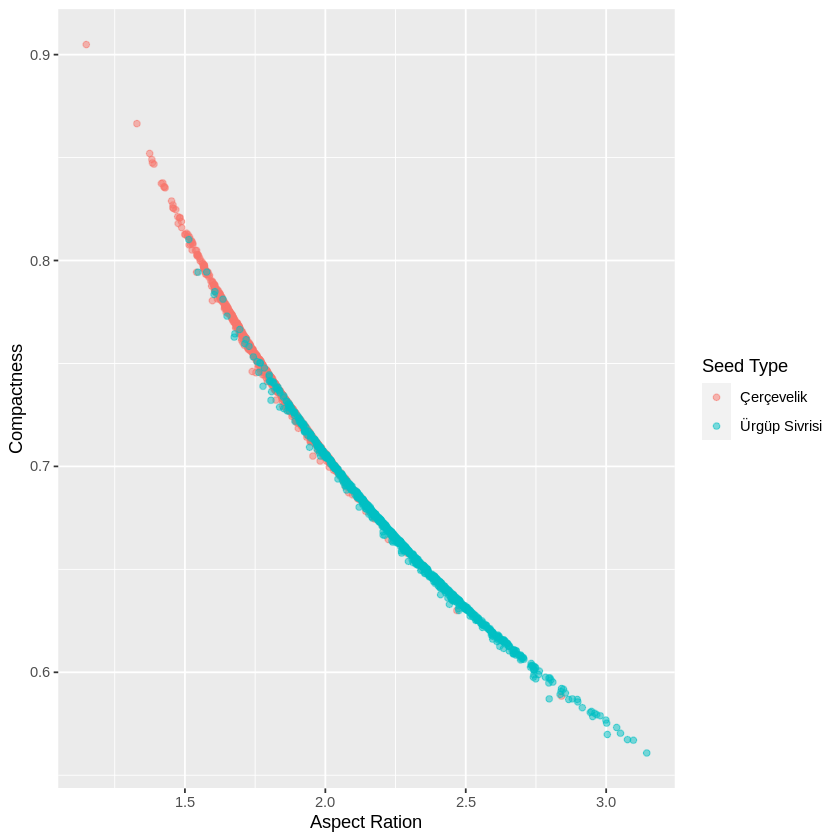

In [11]:
pumpkin_plot_3 <- ggplot(train_pumpkin, aes(x = Aspect_Ration, y = Compactness, color = Class)) +
                    geom_point(alpha = 0.5) +
                    labs(x = "Aspect Ration", y = "Compactness", color = "Seed Type")

pumpkin_plot_3

## Methods
Since the data obtained only consist of one set, we will first random and separate the data into train data and test data. The dataset comprises various variables for each pumpkin observation. However, we will focus on a subset of these variables for predicting the pumpkin class. Specifically, major axis length, minor axis length, eccentricity, aspect ratio, and compactness will be utilized in our prediction model. We will then make the recipe with such variables and find the best K-value for a K-nearest model specification.
### Data Analysis and Variable Selection

The column selection process involved an examination of all parameters, in which each column was individually visualized to determine its suitability for our project. The selected column we will use is Major_Axis_Length, Minor_Axis_Length, Eccentricity, Roundness, Aspect_Ration, and Compactness since, from the previous visualization above, there is a notable clustering pattern that might be good for our model. Additionally, we will examine the accuracy of the model by adding or removing other parameters.

### Result Visualization

As we plan to use cross-validation methods and find out the best value of k to be used, it will also show us the estimated accuracy, so creating a visualization as a line plot between k values and accuracy will be one of our visual results. The use of a confusion table for visualizing and analyzing the model failure (if any) also will be utilized to determine the weaknesses of the model or dataset. 

## Expected outcomes and significance

Given that we are dealing with only two classes of pumpkins and our data exhibits distinct clustering when we plot all the parameters sequentially in a scatter plot, we anticipate achieving a high prediction accuracy. These findings could be valuable for agriculture companies seeking to automate their production lines in order to improve efficiency within the industry. In light of this, a question that arises is whether this method remains feasible when dealing with a greater variety of pumpkin seeds in the classification process.

## References

Dataset: https://www.muratkoklu.com/datasets/

Citation for the usage of data from paper: 

KOKLU, M., SARIGIL, S., & OZBEK, O. (2021). The use of machine learning methods in classification of pumpkin seeds (Cucurbita pepo L.). Genetic Resources and Crop Evolution, 68(7), 2713-2726. Doi: https://doi.org/10.1007/s10722-021-01226-0
